## Chapter 13. 시계열 데이터

In [1]:
# 버전 안내
import pandas as pd
print(f'교재 권장 버전: Pandas 2.2.2')
print(f'현재 실행 버전: Pandas {pd.__version__}')

교재 권장 버전: Pandas 2.2.2
현재 실행 버전: Pandas 2.2.2


### 13.1. 시계열 데이터 소개

#### 13.1.1. 시계열 데이터의 종류

<img src=https://i.postimg.cc/cLzt2fdz/image.png, width=600>

#### 13.1.2. datetime 자료형

📌 timestamp와 datetime 관계

- timestamp: **시점(point in time)**  
  → 정수(UNIX time)로도 표현 가능  
  → 날짜·시간 형식으로도 표현 가능

- datetime = **timestamp를 날짜·시간 형식으로 표현한 자료형**  

#### 13.1.3. 시계열 데이터의 학습 주안점

1. 변환(to_datetime 함수)
2. 주기
3. 생성(date_range 함수)
4. 그룹화와 그룹 집계(resample 함수)
5. 특정 시계열 데이터 추출(dt 접근자와 다양한 메서드)

### 13.2. 시계열 데이터로 변환 및 인덱싱

#### 13.2.1. 시계열 데이터로 변환하기(to_datetime)

<img src=https://i.postimg.cc/8PJ7Wjdg/image.png, width=600>

⭐ 판다스 `to_datetime`

datetime 자료형으로 변환하는 함수

<br>

⭐ `to_datetime` 함수의 주요 매개변수와 인수, 기본값

```python
pd.to_datetime(arg, errors='raise', utc=False, format=None, origin='unix', unit='ns')
```

- **arg**: datetime으로 변환할 데이터를 입력한다. 단일 값이거나 1차원 배열만 가능하다.

- **errors**: 변환 불가능한 데이터를 처리하는 방법을 지정한다.

- **utc**: 시간대(timezone)가 포함된 데이터를 협정 세계시(UTC)로 변환할지 지정한다.

- **format**: 문자열의 날짜 표기 형식을 지정한다.

- **unit**: timestamp가 숫자로 주어질 때 숫자의 기본 단위를 지정한다. 기본값은 'ns'이며 nano second이다.

- **origin**: timestamp가 숫자로 주어질 때 기준 날짜를 지정한다.

<br>

In [2]:
# 코드 13-1. to_datetime 함수 실습 예제 코드
import pandas as pd
data = ['2023-01-01', '2023-02-02', '2023-03-02', '2023-04-10', '2023-05-31']
s = pd.Series(data)
s1 = pd.Series(['2022-01-03', '김판다'])
s

,0
0,2023-01-01
1,2023-02-02
2,2023-03-02
3,2023-04-10
4,2023-05-31


In [3]:
# 코드 13-2. to_datetime 함수로 시리즈 s를 datetime 자료형으로 변환하기


In [4]:
# 코드 13-3. errors='coerce'로 datetime 자료형으로 변환하기
print(s1, '\n') # s1과 빈 행을 출력하는 코드
# s1을 errors='coerce'로 datetime 자료형으로 변환


0    2022-01-03
1           김판다
dtype: object 



#### 13.2.2. 기타 시계열 변환 함수

### [표 13-1] 시계열 데이터 변환 및 생성

| 분류 | Timestamp | Period | Timedelta |
| :--- | :--- | :--- | :--- |
| **단일 값 생성** | `pd.Timestamp` | `pd.Period` | `pd.Timedelta` |
| **배열 생성** | `pd.date_range` | `pd.period_range` | `pd.timedelta_range` |
| **변환** | `pd.to_datetime` | `to_period` | `pd.to_timedelta` |

In [5]:
# 코드 13-4. 시계열 데이터 날짜를 2일씩 더하기
s2 = pd.to_datetime(s).copy() # s2 생성
# s2의 날짜를 2일씩 더하기


In [6]:
# 코드 13-5. s2를 분기의 period 자료형으로 변환하기(Q)


#### 13.2.3. 파일에서 datetime 자료형을 지정하여 데이터 프레임 불러오기

- 매개변수 `parse_dates` 활용

  ```python
  pd.read_excel('파일 경로명', parse_dates=['열 이름'])
  ```

#### 13.2.4. DatetimeIndex의 인덱싱과 슬라이싱

📌 datetime 인덱싱과 슬라이싱 조건  
  - 인덱스가 **DatetimeIndex**여야 함
  
  - DatetimeIndex가 **시간순으로 정렬**되어 있어야 함



In [7]:
# 코드 13-6. DatetimeIndex의 인덱싱과 슬라이싱 실습 예제 코드
import pandas as pd
date = ['2025-12-31 00:30:10', '2026-01-10 16:40:10', '2026-01-10 18:50:10',
        '2026-02-01 07:00:10', '2026-02-12 16:40:10', '2026-04-01 19:20:10']
s = pd.Series([10, 20, 30, 40, 50, 60], index=pd.to_datetime(date))
s

,0
2025-12-31 00:30:10,10
2026-01-10 16:40:10,20
2026-01-10 18:50:10,30
2026-02-01 07:00:10,40
2026-02-12 16:40:10,50
2026-04-01 19:20:10,60


In [8]:
# 코드 13-7. info 함수로 시리즈 s의 DatetimeIndex 보유 여부 확인하기
s.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 6 entries, 2025-12-31 00:30:10 to 2026-04-01 19:20:10
Series name: None
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 96.0 bytes


In [9]:
# 코드 13-8. s에서 2026년의 데이터 인덱싱


In [10]:
# 코드 13-9. s에서 2026년 1분기의 데이터 인덱싱


In [11]:
# 코드 13-10. s에서 2026년 1월에서 2026년 2월의 데이터 슬라이싱


In [12]:
# 코드 13-11. s에서 2026년 1월 10일 18시 이후의 데이터 슬라이싱


#### 13.2.5. 특정 시간대의 데이터 추출하기

<img src=https://i.postimg.cc/g2PXyGkt/image.png, width=600>

⭐ 판다스 `at_time`

특정 시각의 데이터만 선택하는 함수

<br>

⭐ `at_time` 함수의 주요 매개변수와 인수, 기본값

```python
df.at_time(time, asof=False, axis=0)
```

- **time**: 선택하려는 시각을 입력한다 (예: '12:00', datetime.time 객체 등).

- **asof**: 시계열 데이터에서 정확히 일치하는 시간이 없을 때 가장 가까운 이전 값을 사용할지 여부를 지정한다.

- **axis**: 축을 지정한다. 기본값은 0(행)이다.

<br>



In [13]:
# 코드 13-12. s에서 날짜와 관계없이 시간이 16:40:10인 데이터 추출하기


<img src=https://i.postimg.cc/HsWk4zfF/image.png, width=600>

⭐ 판다스 `between_time`

특정 시간 범위 사이의 데이터를 선택하는 함수

<br>

⭐ `between_time` 함수의 주요 매개변수와 인수, 기본값

```python
df.between_time(start_time, end_time, inclusive='both', axis=0)
```

- **start_time**, **end_time**: 시작 시각과 종료 시각을 지정한다.

- **inclusive**: 경계값을 포함할지 여부를 지정한다 ('both', 'neither', 'left', 'right').

- **axis**: 축을 지정한다. 기본값은 0(행)이다.

<br>

In [14]:
# 코드 13-13. s에서 날짜와 관계없이 07시에서 18시 사이의 데이터만 추출하기


### 엑셀 예제 21. 시계열 데이터가 포함된 온라인 쇼핑몰 데이터 다루기 (1)

In [15]:
# 코드 13-14. 온라인 쇼핑몰 로그 데이터 파일에서 데이터 프레임 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
url1 = 'https://github.com/panda-kim/book1/blob/main/22ecomerce.xlsx?raw=true'
df_ec = pd.read_excel(url1, parse_dates=['Date'], index_col='Date')
df_ec

,Ucode,Category,Pcode,Price,Action
Date,,,,,
2022-06-01 00:00:01,u514028527,Fashion,p13071150,411.59,V
2022-06-01 00:00:13,u550193582,Car,p12705151,51.22,C
2022-06-01 00:00:19,u542985695,Food,p12705928,139.58,B
...,...,...,...,...,...
2022-06-06 23:59:29,u534987603,Food,p71018150,115.81,V
2022-06-06 23:59:43,u553673695,Food,p30400010,584.75,V
2022-06-06 23:59:50,u524946851,Food,p54900011,64.35,V


In [16]:
# 코드 13-15. info 함수로 df_ec의 DatetimeIndex 보유 여부 확인하기
df_ec.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62455 entries, 2022-06-01 00:00:01 to 2022-06-06 23:59:50
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ucode     62455 non-null  object 
 1   Category  62455 non-null  object 
 2   Pcode     62455 non-null  object 
 3   Price     62455 non-null  float64
 4   Action    62455 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.9+ MB


In [17]:
# 코드 13-16. 2022년 6월 3일의 데이터 추출하기


In [18]:
# 코드 13-17. 2022년 6월 3일과 6월 4일의 00시부터 03시까지의 데이터만 추출


### 13.3. 시계열 데이터 생성과 주기

#### 13.3.1. 주기

- 판다스의 주기는 v2.2.2부터 새로운 표기법이 도입되었습니다.

- v2.2.2에서는 혼용이 가능하지만 v3.0.0부터는 기존 방식(M, Y, Q, T 등)을 사용하면 에러가 발생하니 유의해야 합니다.

- 공식문서에서 주기 확인 : https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

[표 13-2] pandas 2.2.2+ 주기 (Offset Aliases)

| 주기 (2.2.2+) | 설명 | 기존(v2.1 이하) 표기 |
| :--- | :--- | :--- |
| **YE** | 연도의 마지막 날 (Year End) | Y |
| **YS** | 연도의 첫날 (Year Start) | YS |
| **QE** | 분기의 마지막 날 (Quarter End) | Q |
| **QS** | 분기의 첫날 (Quarter Start) | QS |
| **ME** | 월의 마지막 날 (Month End) | M |
| **MS** | 월의 첫날 (Month Start) | MS |
| **W** | 한 주의 마지막인 일요일 | W |
| **D** | 일 (Day) | D |
| **B** | 휴일을 제외한 평일 (Business Day) | B |
| **h** | 시각 (Hour) | H |
| **min** | 분 (Minute) | T |
| **s** | 초 (Second) | S |
| **W-MON, W-TUE 등** | 요일별 주기 |  W-MON, W-TUE 등  |
| **QE-FEB** | 분기의 마지막 날(2월 결산 기준) | Q-FEB |

<br>

#### 13.3.2. 시계열 데이터 생성(date_range)

⭐ 판다스 `date_range`

고정된 주기를 가진 DatetimeIndex를 생성하는 함수

<br>

⭐ `date_range` 함수의 주요 매개변수와 인수, 기본값

```python
pd.date_range(start=None, end=None, periods=None, freq='D')
```

- **start**: 시작 시점을 지정한다. start, end, periods 셋 중에 둘만 지정해도 된다.

- **end**: 끝 시점을 지정한다.

- **periods**: 생성할 배열의 개수를 지정한다.

- **freq**: 배열에 적용될 고정된 주기를 지정한다. 기본값은 'D'(일 단위)이다.

<br>


In [19]:
# 코드 13-18. 2025-01-03부터 2025-01-14까지 모든 날짜를 배열로 생성하기


In [20]:
# 코드 13-19. 2025-01-03부터 4개의 날짜를 배열로 생성하기


In [21]:
# 코드 13-20. 2024-03-30부터 오늘까지 모든 날짜를 배열로 생성하기
# 문자열 today 활용


In [22]:
# 코드 13-21. 2025-01-03부터 월의 마지막 날 4개를 배열로 생성하기


In [23]:
# 코드 13-22. 2025-01-03부터 월의 첫날 4개를 배열로 생성하기


In [24]:
# 코드 13-23. 2025-01-03부터 2개월 주기로 첫날 4개를 배열로 생성하기


In [25]:
# 코드 13-24. 2025-01-03부터 2025-02-03까지 영업일만 배열로 생성하기


In [26]:
# 코드 13-25. 2025-01-03 00:00:00부터 10분 주기로 배열 생성하기


In [27]:
# 코드 13-26. 2025-01-03 00:00:00부터 10분 30초 주기로 배열 생성하기


### 13.4. 시계열 데이터 그룹화하기

#### 13.4.1. 그룹화로 열 가공하기(resample)

<img src=https://i.postimg.cc/ydXvB76G/image.png, width=600>

⭐ 판다스 `resample`

시간의 흐름에 따라 그룹화해서 함수를 적용하는 함수

<br>

⭐ `resample` 함수의 주요 매개변수와 인수, 기본값

```python
df.resample(rule, on=None, level=None, origin='start_day')
```
- **rule**: 집계할 기준 주기를 입력한다. (예: 일 단위 집계라면 'D', 월 단위 집계라면 'M' 또는 'MS')

- **on**: 시계열 데이터를 보유한 열을 지정한다. 지정된 열은 반드시 datetime 자료형이어야 한다. DatetimeIndex를 보유한 객체는 on을 지정할 필요가 없다.

- **level**: 멀티 인덱스일 때 시계열 데이터가 존재하는 인덱스의 레벨을 지정한다.

- **origin**: 일, 시, 분, 초의 주기에서 기간의 시작점을 지정한다. 기본값은 'start_day'이며 시계열 데이터의 첫 번째 날짜의 00:00:00이 시작점이다.

<br>


In [28]:
# 코드 13-27. resample 함수 실습 예제 코드
import pandas as pd
data = {'날짜': ['2024-02-01', '2024-03-15', '2024-03-30',
                 '2024-03-31', '2024-04-02', '2024-04-05'],
        '금액': [1000, 2000, 3000, 4000, 5000, 6000]}
df = pd.DataFrame(data)
df

,날짜,금액
0,2024-02-01,1000
1,2024-03-15,2000
2,2024-03-30,3000
3,2024-03-31,4000
4,2024-04-02,5000
5,2024-04-05,6000


In [29]:
# 코드 13-28. df의 날짜 열을 datetime 자료형으로 변환하기



In [30]:
# 코드 13-29. df에서 금액 열의 월별 누적 합 구하기


In [31]:
# 코드 13-30. df에서 월별로 그룹을 나누어 집계 결과를 시리즈로 생성하기


#### 13.4.2. resample 함수와 groupby 함수 비교

📌 시계열 그룹화에서 resample vs groupby  
  - resample: datetime 인덱스 기반 시계열 전용 집계  
  - groupby: 시계열 정보를 담은 별도 열 혹은 그루퍼가 필요  
  - 결과는 동일하지만 시계열에서는 resample이 더 간편


In [32]:
# 코드 13-31. groupby 함수와 resample 함수 비교 예제 코드
data1 = {'날짜': ['2024-02-01', '2024-03-15', '2024-03-30',
                  '2024-03-31', '2024-04-02', '2024-04-05'],
         '월': ['2024-02', '2024-03', '2024-03',
                '2024-03', '2024-04', '2024-04'],
         '금액': [1000, 2000, 3000, 4000, 5000, 6000]}
df1 = pd.DataFrame(data1)
df1['날짜'] = pd.to_datetime(df1['날짜']) # datetime으로 변환
df1

,날짜,월,금액
0,2024-02-01,2024-02,1000
1,2024-03-15,2024-03,2000
2,2024-03-30,2024-03,3000
3,2024-03-31,2024-03,4000
4,2024-04-02,2024-04,5000
5,2024-04-05,2024-04,6000


In [33]:
# 코드 13-32. df1에서 resample 함수로 월별 누적 합 구하기


In [34]:
# 코드 13-33. df1에서 groupby 함수로 월별 누적 합 구하기


In [35]:
# 코드 13-34. df1에서 resample 함수로 분기별 누적 합 구하기


#### 13.4.3. 그룹 집계하기(resample)

- resample 함수로 **시계열 기반 그룹 집계**도 가능


In [36]:
# 코드 13-35. resample 함수와 집계 함수 실습 예제 코드
date = pd.date_range('2024-01-30 19:00', periods=6, freq='9h')
data = {'날짜': date,
        '매출': [10000, 20000, 30000, 40000, 50000, 60000],
        '마진': [1000, 2000, 4000, 6000, 7000, 8000]}
df = pd.DataFrame(data)
df

,날짜,매출,마진
0,2024-01-30 19:00:00,10000,1000
1,2024-01-31 04:00:00,20000,2000
2,2024-01-31 13:00:00,30000,4000
3,2024-01-31 22:00:00,40000,6000
4,2024-02-01 07:00:00,50000,7000
5,2024-02-01 16:00:00,60000,8000


In [37]:
# 코드 13-36. df에서 일자별 매출 합 집계


In [38]:
# 코드 13-37. df에서 월별 매출 합 집계(월의 마지막날로 표기)


In [39]:
# 코드 13-38. df에서 월별 매출 합 집계(월의 첫날로 표기)


In [40]:
# 코드 13-39. df에서 월별 매출 합과 마진 합 집계


In [41]:
# 코드 13-40. df에서 월별 일평균 매출


#### 13.4.4. resample 함수에 agg 함수 적용하기

- resample에 agg를 적용하면 **맞춤형 시계열 집계**를 수행

In [42]:
# 코드 13-41. 매출 합과 매출 건수 집계(일 기준)
# df에서 매출합과 매출 건수를 집계해 변수 tmp로 지정





In [43]:
# 코드 13-42. 매출 합, 일 평균 매출, 매출 건수 집계(월 기준)
# tmp를 사용해 월별 매출합과 일평균_매출, 매출건수 집계






#### 13.4.5. groupby 함수와 resample 함수를 동시에 적용하기

📌 시계열 + 일반 열 동시 그룹화  
- **groupby → resample** 순서로 조합해 사용  

- 기억법: 그룹화니까 **ㄱ→ㄹ**, 또는 group이니까 g → r


In [44]:
# 코드 13-43. groupby와 resample 동시에 적용 실습 예제 코드
import pandas as pd
date = pd.date_range('2024-01-30 19:00', periods=6, freq='9h')
data1 = {'날짜': date,
         '제품': ['A', 'B', 'A', 'A', 'B', 'A'],
         '매출': [10000, 20000, 30000, 40000, 50000, 60000]}
df1 = pd.DataFrame(data1)
df1

,날짜,제품,매출
0,2024-01-30 19:00:00,A,10000
1,2024-01-31 04:00:00,B,20000
2,2024-01-31 13:00:00,A,30000
3,2024-01-31 22:00:00,A,40000
4,2024-02-01 07:00:00,B,50000
5,2024-02-01 16:00:00,A,60000


In [45]:
# 코드 13-44. df1에서 제품으로 그룹을 나누어 일자별 매출 합을 집계


In [46]:
# 코드 13-45. 코드 13-44의 결과를 교차표로 생성하기


### 엑셀 예제 22. 시계열 데이터가 포함된 온라인 쇼핑몰 데이터 다루기 (2)


In [47]:
# 엑셀 예제 21의 온라인 쇼핑몰 데이터 다시 불러오기(코드 13-14와 동일)
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
url1 = 'https://github.com/panda-kim/book1/blob/main/22ecomerce.xlsx?raw=true'
df_ec = pd.read_excel(url1, parse_dates=['Date'], index_col='Date')
df_ec

,Ucode,Category,Pcode,Price,Action
Date,,,,,
2022-06-01 00:00:01,u514028527,Fashion,p13071150,411.59,V
2022-06-01 00:00:13,u550193582,Car,p12705151,51.22,C
2022-06-01 00:00:19,u542985695,Food,p12705928,139.58,B
...,...,...,...,...,...
2022-06-06 23:59:29,u534987603,Food,p71018150,115.81,V
2022-06-06 23:59:43,u553673695,Food,p30400010,584.75,V
2022-06-06 23:59:50,u524946851,Food,p54900011,64.35,V


In [48]:
# 코드 13-46. 6시간마다 순 방문자 수와 페이지 뷰를 집계하기




In [49]:
# 코드 13-47. 6시간마다 순 방문자 수와 페이지 뷰를 집계한 결과 시각화
title1 = 'Unique visitor vs Page view (per 6H)'
# marker='o', colormap='RdBu', title=title1




In [50]:
# 코드 13-48. 6시간마다 각 카테고리의 매출 금액 집계하기
# Action이 'B'(buy)일 때 매출이 발생한다.
cond = df_ec['Action'] == 'B'


In [51]:
# 코드 13-49. 6시간마다 각 카테고리의 매출 금액 집계 시각화
title2 = 'Sales Amount by Category ($ / 6H)'
# marker='o', colormap='RdBu', title=title2






In [52]:
# 코드 13-50. 6시간마다 각 카테고리의 매출 금액 집계 시각화(subplot)
# marker='o', colormap='RdBu', title=title2, subplots=True, layout=(2, 2)






### 13.5. 특정 시계열 데이터 추출

#### 13.5.1. 특정 시계열 데이터 추출하는 다양한 메서드(dt 접근자)

[표 13-3] 시계열 데이터의 특정 데이터만 반환하는 다양한 속성(attribute)과 함수

| 속성 또는 함수 | 추출 대상 | 예 (2025-02-03 18:10:30) | 자료형 |
| :--- | :--- | :--- | :--- |
| **year** | 연도 | 2025 | int |
| **quarter** | 분기 | 1 | int |
| **month** | 월 | 2 | int |
| **day** | 일 | 3 | int |
| **hour** | 시 | 18 | int |
| **minute** | 분 | 10 | int |
| **second** | 초 | 30 | int |
| **weekday** | 요일 (0:월요일 ~ 6:일요일) | 0 | int |
| **dayofyear** | 연중 몇 번째 날 | 34 | int |
| **days_in_month** | 소속 달의 총 일수 | 28 | int |
| **date** | 날짜 부분만 | 2025-02-03 | object (datetime.date) |
| **time** | 시간 부분만 | 18:10:30 | object (datetime.time) |
| **day_name()** | 요일의 영문명 | Monday | object (str) |
| **month_name()** | 월의 영문명 | February | object (str) |
| **isocalendar()** | 연도, 주, 요일을 데이터 프레임으로 반환 | (2025, 6, 1) | DataFrame (int) |
| **normalize()** | 시간을 00:00:00으로 변환 | 2025-02-03 | datetime64[ns] |

<br>

In [53]:
# 코드 13-51. 다양한 시계열 데이터 추출 실습 예제 코드
import pandas as pd
idx = pd.date_range('2023-11-03', periods=6, freq='43D 9h 10min 13s')
s1 = pd.Series(idx)
s2 = pd.Series([10, 20, 30, 40, 50, 60], index=idx)
s1

,0
0,2023-11-03 00:00:00
1,2023-12-16 09:10:13
2,2024-01-28 18:20:26
3,2024-03-12 03:30:39
4,2024-04-24 12:40:52
5,2024-06-06 21:51:05


In [54]:
# 코드 13-52. 시계열 시리즈 s1에서 다양한 시계열 데이터 추출 실습
# 연도, 분기, 월, 일, 시각, 분, 초






In [55]:
# 코드 13-53. 시간을 제외하고 날짜만 출력하기


<img src=https://i.postimg.cc/qRMjk9tB/image.png, width=600>

In [56]:
# 코드 13-54. DatetimeIndex에서 다양한 시계열 데이터 추출 실습
# 연도, 분기, 월, 일, 시각, 분, 초








#### 13.5.2. 문자열로 변환하기(strftime)

[표 13-4] 표기 형식을 지정하는 지시자(directive)

| 지시자 | 뜻 | 예 (2025-02-03 18:10:30) |
| :--- | :--- | :--- |
| **%y** | 연도의 뒤 두 자리 | 25 |
| **%Y** | 연도 (4자리) | 2025 |
| **%m** | 월 (0으로 채움) | 02 |
| **%B** | 월의 영문 전체 명칭 | February |
| **%b** | 월의 영문 약자 | Feb |
| **%w** | 요일 (0: 일요일, 1: 월요일, ...) | 1 |
| **%A** | 요일의 영문 전체 명칭 | Monday |
| **%a** | 요일의 영문 약자 | Mon |
| **%d** | 일 (0으로 채움) | 03 |
| **%H** | 시각 (24시 기준, 0으로 채움) | 18 |
| **%I** | 시각 (12시 기준, 0으로 채움) | 06 |
| **%p** | AM과 PM의 구분 | PM |
| **%M** | 분 (0으로 채움) | 10 |
| **%S** | 초 (0으로 채움) | 30 |
| **%q** | 분기 (Period 자료형일 때만 사용 가능) | 1 |

<br>

In [57]:
# 코드 13-55. datetime인 s1을 '%m/%d/%y' 형식의 문자열로 변환


In [58]:
# 코드 13-56. datetime인 s1을 '%Y/%m' 형식의 문자열로 변환


#### 13.5.3. period 자료형으로 변환하기(to_period)

- resample 결과는 **DatetimeIndex**로 반환

- 기간을 더 직관적으로 표현하려면 **period 자료형**을 사용

In [59]:
# 코드 13-57. 분기별로 집계한 뒤, 인덱스를 PeriodIndex로 변환
# 분기별 집계 결과를 tmp로 저장
tmp = s2.resample('QE').sum()
# tmp의 인덱스를 PeriodIndex로 변환


### 엑셀 예제 23. 시계열 데이터가 포함된 온라인 쇼핑몰 데이터 다루기 (3)

In [60]:
# 엑셀 예제 21의 온라인 쇼핑몰 데이터 다시 불러오기(코드 13-14와 동일)
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
url1 = 'https://github.com/panda-kim/book1/blob/main/22ecomerce.xlsx?raw=true'
df_ec = pd.read_excel(url1, parse_dates=['Date'], index_col='Date')
df_ec

,Ucode,Category,Pcode,Price,Action
Date,,,,,
2022-06-01 00:00:01,u514028527,Fashion,p13071150,411.59,V
2022-06-01 00:00:13,u550193582,Car,p12705151,51.22,C
2022-06-01 00:00:19,u542985695,Food,p12705928,139.58,B
...,...,...,...,...,...
2022-06-06 23:59:29,u534987603,Food,p71018150,115.81,V
2022-06-06 23:59:43,u553673695,Food,p30400010,584.75,V
2022-06-06 23:59:50,u524946851,Food,p54900011,64.35,V


In [61]:
# 코드 13-58. 시각의 데이터를 hour 열로 생성




In [62]:
# 코드 13-59. 6일간의 데이터를 시각으로 그룹을 나눠 페이지 뷰 구하기


In [63]:
# 코드 13-60. 코드 13-59의 결과를 시각화
title3 = 'Distribution of page views by hour'
# marker='o', colormap='RdBu', title=title3




### 13.6. 그 외 시계열 데이터를 다루는 함수들

#### 13.6.1. 시간대 변환

In [64]:
# 실습을 위해 코드 13-51 다시 실행하기
import pandas as pd
idx = pd.date_range('2023-11-03', periods=6, freq='43D 9h 10min 13s')
s1 = pd.Series(idx)
s2 = pd.Series([10, 20, 30, 40, 50, 60], index=idx)
s1

,0
0,2023-11-03 00:00:00
1,2023-12-16 09:10:13
2,2024-01-28 18:20:26
3,2024-03-12 03:30:39
4,2024-04-24 12:40:52
5,2024-06-06 21:51:05


In [65]:
# 코드 13-61. 시간대 지정하기('Asia/Seoul')
s1.dt.tz_localize('Asia/Seoul')

,0
0,2023-11-03 00:00:00+09:00
1,2023-12-16 09:10:13+09:00
2,2024-01-28 18:20:26+09:00
3,2024-03-12 03:30:39+09:00
4,2024-04-24 12:40:52+09:00
5,2024-06-06 21:51:05+09:00


In [66]:
# 코드 13-62. 시간대를 지정하고 동부 표준시(EST)로 변환하기
s1.dt.tz_localize('Asia/Seoul').dt.tz_convert('EST')

,0
0,2023-11-02 10:00:00-05:00
1,2023-12-15 19:10:13-05:00
2,2024-01-28 04:20:26-05:00
3,2024-03-11 13:30:39-05:00
4,2024-04-23 22:40:52-05:00
5,2024-06-06 07:51:05-05:00


#### 13.6.2. 시간 간격 생성하기(DateOffset)

In [67]:
# 코드 13-63. 자료형을 그대로 두고 14시간의 시차만 조정하기
s1 - pd.Timedelta('14h')

,0
0,2023-11-02 10:00:00
1,2023-12-15 19:10:13
2,2024-01-28 04:20:26
3,2024-03-11 13:30:39
4,2024-04-23 22:40:52
5,2024-06-06 07:51:05


In [68]:
# 코드 13-64. 3개월 후의 datetime으로 변환하기
s1 + pd.DateOffset(months=3)

,0
0,2024-02-03 00:00:00
1,2024-03-16 09:10:13
2,2024-04-28 18:20:26
3,2024-06-12 03:30:39
4,2024-07-24 12:40:52
5,2024-09-06 21:51:05


In [69]:
# 코드 13-65. 코드 13-64의 매개변수를 months가 아니라 month로 입력한 결과
s1 + pd.DateOffset(month=3)

/tmp/ipython-input-4263486035.py:2: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  s1 + pd.DateOffset(month=3)


,0
0,2023-03-03 00:00:00
1,2023-03-16 09:10:13
2,2024-03-28 18:20:26
3,2024-03-12 03:30:39
4,2024-03-24 12:40:52
5,2024-03-06 21:51:05


코드 13-65에서 발생하는 PerformanceWarning은 DateOffset 함수와 연산을 적용할 때 벡터화 연산이 아니라서 성능 저하가 발생할 수 있음을 알리는 경고입니다.

#### 13.6.3. 시계열 그루퍼 생성하기(Grouper)

⭐ 판다스 `pd.Grouper`

`groupby` 내에서 시간 주기나 특정 레벨을 기준으로 더 세밀하게 그룹화 조건을 설정할 수 있도록 돕는 객체

<br>

⭐ `pd.Grouper` 함수의 주요 매개변수와 인수, 기본값

```python
pd.Grouper(key=None, level=None, freq=None, axis=0, sort=False, origin='start_day')
```

- **key**: 그룹화의 기준이 될 열(column) 이름을 지정한다. (반드시 datetime 자료형이어야 한다.)

- **level**: 멀티 인덱스인 경우 그룹화할 인덱스의 레벨을 지정한다.

- **freq**: 그룹화할 시간 주기를 지정한다.

- **axis**: 축을 지정한다. 기본값은 0(행)이다.

- **sort**: 그룹 키를 정렬할지 여부를 지정한다.

- **origin**: 주기의 시작점을 지정한다. `resample`의 origin 매개변수와 동일하게 작동한다.

<br>

In [70]:
# 실습을 위해 코드 13-43 다시 실행하기
import pandas as pd
date = pd.date_range('2024-01-30 19:00', periods=6, freq='9h')
data1 = {'날짜': date,
         '제품': ['A', 'B', 'A', 'A', 'B', 'A'],
         '매출': [10000, 20000, 30000, 40000, 50000, 60000]}
df1 = pd.DataFrame(data1)
df1

,날짜,제품,매출
0,2024-01-30 19:00:00,A,10000
1,2024-01-31 04:00:00,B,20000
2,2024-01-31 13:00:00,A,30000
3,2024-01-31 22:00:00,A,40000
4,2024-02-01 07:00:00,B,50000
5,2024-02-01 16:00:00,A,60000


In [71]:
# 코드 13-66. Grouper 함수를 이용해 시계열 그루퍼를 생성해 집계하기
df1.groupby(['제품', pd.Grouper(key='날짜', freq='D')])['매출'].sum()

제품  날짜        
A   2024-01-30    10000
    2024-01-31    70000
    2024-02-01    60000
B   2024-01-31    20000
    2024-02-01    50000
Name: 매출, dtype: int64

In [72]:
# 코드 13-66의 결과와 groupby와 resample를 사용한 결과를 비교
df1.groupby('제품').resample(rule='D', on='날짜')['매출'].sum()

제품  날짜        
A   2024-01-30    10000
    2024-01-31    70000
    2024-02-01    60000
B   2024-01-31    20000
    2024-02-01    50000
Name: 매출, dtype: int64

In [73]:
# 코드 13-67. Grouper 함수로 시계열과 일반 열을 동시에 그룹화해 열 가공하기
df1.groupby(['제품', pd.Grouper(key='날짜', freq='D')])['매출'].cumsum()

,매출
0,10000
1,20000
2,30000
3,70000
4,50000
5,60000


<img src=https://i.postimg.cc/rFN6wLsb/image.png, width=600>

<br>

#### 13.6.4. 영업일만 배열로 생성하기(bdate_range)

⭐ 판다스 `bdate_range`

영업일(Business Day)을 기준으로 고정된 주기를 가진 DatetimeIndex를 생성하는 함수

<br>

⭐ `bdate_range` 함수의 주요 매개변수와 인수, 기본값

```python
pd.bdate_range(start=None, end=None, periods=None, freq='B', weekmask=None, holidays=None)
```

- **start**: 시작 시점을 지정한다.

- **end**: 끝 시점을 지정한다.

- **periods**: 생성할 배열의 개수를 지정한다.

- **freq**: 배열에 적용될 주기를 지정한다. 기본값은 'B'(평일, 월-금)이다.

- **weekmask**: 영업일로 간주할 요일을 지정한다. (예: 'Mon Tue Wed Thu Fri')

- **holidays**: 영업일에서 제외할 특정 날짜(공휴일) 리스트를 지정한다.

<br>

<img src=https://i.postimg.cc/HWbR6CwH/image.png, width=600>

In [74]:
# 코드 13-68. 2024-08-09부터 8개의 영업일을 배열로 생성(date_range)
pd.date_range('2024-08-09', periods=8, freq='B')

DatetimeIndex(['2024-08-09', '2024-08-12', '2024-08-13', '2024-08-14',
               '2024-08-15', '2024-08-16', '2024-08-19', '2024-08-20'],
              dtype='datetime64[ns]', freq='B')

In [75]:
# 코드 13-69. 2024-08-09부터 광복절을 제외한 8개의 영업일을 배열로 생성
holidays = ['2024-08-15']
pd.bdate_range('2024-08-09', periods=8, freq='C', holidays=holidays)

DatetimeIndex(['2024-08-09', '2024-08-12', '2024-08-13', '2024-08-14',
               '2024-08-16', '2024-08-19', '2024-08-20', '2024-08-21'],
              dtype='datetime64[ns]', freq='C')

In [76]:
# 코드 13-70. 2024-08-09부터 토요일을 포함한 8개의 영업일을 배열로 생성
weekmask = 'Mon Tue Wed Thu Fri Sat'
holidays = ['2023-08-15']
pd.bdate_range(
    '2023-08-09', periods=8, freq='C', holidays=holidays, weekmask=weekmask
)

DatetimeIndex(['2023-08-09', '2023-08-10', '2023-08-11', '2023-08-12',
               '2023-08-14', '2023-08-16', '2023-08-17', '2023-08-18'],
              dtype='datetime64[ns]', freq='C')

#### 13.6.5. 업샘플링(asfreq 외)



In [77]:
# 코드 13-71. 업샘플링 실습 예제 코드
import pandas as pd
idx1 = pd.to_datetime(['2024-08-14 09', '2024-08-14 11', '2024-08-19 09'])
idx2 = pd.to_datetime(['2024-08-14', '2024-08-16', '2024-08-19'])
s1 = pd.Series([10, 20, 50], index=idx1)
s2 = pd.Series([10, 20, 50], index=idx2)
s1

,0
2024-08-14 09:00:00,10
2024-08-14 11:00:00,20
2024-08-19 09:00:00,50


In [78]:
# 코드 13-72. 일자별 구매량 집계하기
s1.resample('D').sum()

,0
2024-08-14,30
2024-08-15,0
2024-08-16,0
2024-08-17,0
2024-08-18,0
2024-08-19,50


In [79]:
# 코드 13-73. 일자별 구매량의 누적 합으로 일자별 보유량 구하기
s1.resample('D').sum().cumsum()

,0
2024-08-14,30
2024-08-15,30
2024-08-16,30
2024-08-17,30
2024-08-18,30
2024-08-19,80


In [80]:
# 코드 13-74. 코드 13-72에서 데이터가 없는 구간은 NaN을 생성하기
s1.resample('D').sum(min_count=1)

,0
2024-08-14,30.0
2024-08-15,NaN
2024-08-16,NaN
2024-08-17,NaN
2024-08-18,NaN
2024-08-19,50.0


⭐ 판다스 `asfreq`

시계열 데이터를 새로운 주기에 맞춰 재조정하는 함수 (데이터 손실 없이 인덱스 빈도를 변경할 때 사용)

<br>

⭐ `asfreq` 함수의 주요 매개변수와 인수, 기본값

```python
df.asfreq(freq, method=None, fill_value=nan)
```

- **freq**: 새로 적용할 주기를 지정한다.

- **method**: 새로운 주기로 생성된 빈 칸(결측값)을 채우는 방법을 지정한다. ('ffill', 'bfill' 등)

- **fill_value**: 결측값을 특정 값으로 채울 때 사용한다. 기본값은 NaN이다.

In [81]:
# 코드 13-75. asfreq 함수로 업샘플링 수행
s2.asfreq('D')

,0
2024-08-14,10.0
2024-08-15,NaN
2024-08-16,20.0
2024-08-17,NaN
2024-08-18,NaN
2024-08-19,50.0


In [82]:
# 코드 13-76. 일자별 구매량의 누적 합으로 일자별 보유량 구하기
s2.asfreq('D', fill_value=0).cumsum()

,0
2024-08-14,10
2024-08-15,10
2024-08-16,30
2024-08-17,30
2024-08-18,30
2024-08-19,80


In [83]:
# 코드 13-77. 2일 간격으로 데이터 필터링
s2.asfreq('2D')

,0
2024-08-14,10.0
2024-08-16,20.0
2024-08-18,NaN


In [84]:
# 코드 13-78. 생성한 시계열 배열과 reindex 함수로 업샘플링 수행
holidays = ['2024-08-15']
date = pd.bdate_range(
    '2024-08-13', end='2024-08-21', freq='C', holidays=holidays
)
s2.reindex(date)

,0
2024-08-13,NaN
2024-08-14,10.0
2024-08-16,20.0
2024-08-19,50.0
2024-08-20,NaN
2024-08-21,NaN


In [85]:
# 코드 13-79. 일자별 구매량의 누적 합으로 일자별 보유량 구하기
s2.reindex(date, fill_value=0).cumsum()

,0
2024-08-13,0
2024-08-14,10
2024-08-16,30
2024-08-19,80
2024-08-20,80
2024-08-21,80


### 엑셀 예제 24. 비트 코인 구매일지의 업샘플링 수행하기

In [86]:
# 코드 13-80. 비트코인 구매 일지 엑셀 파일에서 데이터 프레임 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
url2 = 'https://github.com/panda-kim/book1/blob/main/23btc.xlsx?raw=true'
df_coin = pd.read_excel(url2, index_col='Date', parse_dates=['Date'])
df_coin

,Symbol,Price,Buy/Sell,Amount,Quantity
Date,,,,,
2020-12-28 17:16:00,BTC/KRW,29600000,Buy,100000,0.003378
2021-01-05 15:13:00,BTC/KRW,34500000,Buy,50000,0.001449
2021-01-12 01:18:00,BTC/KRW,35200000,Buy,50000,0.001420
...,...,...,...,...,...
2023-10-08 19:44:00,BTC/KRW,37850000,Buy,378500,0.010000
2023-10-09 18:50:00,BTC/KRW,37500000,Buy,375000,0.010000
2023-10-11 11:32:00,BTC/KRW,37200000,Buy,372000,0.010000


In [87]:
# 코드 13-81. 일자별 구매 금액과 구매량을 집계 후, 2024-03-04일까지 업샘플링
tmp = df_coin.resample('D')[['Amount', 'Quantity']].sum()
date = pd.date_range('2020-12-28', '2024-03-04')
tmp = tmp.reindex(date,fill_value=0)
tmp

,Amount,Quantity
2020-12-28,100000,0.003378
2020-12-29,0,0.000000
2020-12-30,0,0.000000
...,...,...
2024-03-02,0,0.000000
2024-03-03,0,0.000000
2024-03-04,0,0.000000


In [88]:
# 코드 13-82. 누적 구매 금액과 누적 구매량 구하기(add_prefix로 열 이름 변환)
tmp.cumsum().add_prefix('Cum ')

,Cum Amount,Cum Quantity
2020-12-28,100000,0.003378
2020-12-29,100000,0.003378
2020-12-30,100000,0.003378
...,...,...
2024-03-02,228047871,7.495755
2024-03-03,228047871,7.495755
2024-03-04,228047871,7.495755


In [89]:
# 코드 13-83. 엑셀 파일의 두 번째 시트 불러와 2020-12-28 이후의 자료만 인덱싱
df_btc = pd.read_excel(
    url2, sheet_name=1, index_col='Date', parse_dates=['Date']
).loc['2020-12-28':]
df_btc

,BTC Close
Date,
2020-12-28,30249000
2020-12-29,30498000
2020-12-30,31891000
...,...
2024-03-02,86383000
2024-03-03,87982000
2024-03-04,88616000


In [90]:
# 코드 13-84. tmp와 tmp의 누적 합과 비트코인 가격을 가로 방향으로 연결하기
out = pd.concat([tmp, tmp.cumsum().add_prefix('Cum '), df_btc], axis=1)
out

,Amount,Quantity,Cum Amount,Cum Quantity,BTC Close
2020-12-28,100000,0.003378,100000,0.003378,30249000
2020-12-29,0,0.000000,100000,0.003378,30498000
2020-12-30,0,0.000000,100000,0.003378,31891000
...,...,...,...,...,...
2024-03-02,0,0.000000,228047871,7.495755,86383000
2024-03-03,0,0.000000,228047871,7.495755,87982000
2024-03-04,0,0.000000,228047871,7.495755,88616000


In [91]:
# 코드 13-85. 변수 out에 분석에 필요한 열 생성하기
# WACB(평균 매수 단가) 열 생성하기
out['WACB'] = out['Cum Amount'] / out['Cum Quantity']

# Profit(순수익) 열 생성하기
out['Profit'] = out['Cum Quantity'] * out['BTC Close'] - out['Cum Amount']

# ROI(%)(수익률) 열 생성하기
out['ROI(%)'] = (out['Profit'] / out['Cum Amount']) * 100
out

,Amount,Quantity,Cum Amount,Cum Quantity,BTC Close,WACB,Profit,ROI(%)
2020-12-28,100000,0.003378,100000,0.003378,30249000,2.959999e+07,2.192617e+03,2.192617
2020-12-29,0,0.000000,100000,0.003378,30498000,2.959999e+07,3.033833e+03,3.033833
2020-12-30,0,0.000000,100000,0.003378,31891000,2.959999e+07,7.739917e+03,7.739917
...,...,...,...,...,...,...,...,...
2024-03-02,0,0.000000,228047871,7.495755,86383000,3.042360e+07,4.194579e+08,183.934150
2024-03-03,0,0.000000,228047871,7.495755,87982000,3.042360e+07,4.314436e+08,189.189938
2024-03-04,0,0.000000,228047871,7.495755,88616000,3.042360e+07,4.361959e+08,191.273846


<Axes: ylabel='Quantity (BTC)'>

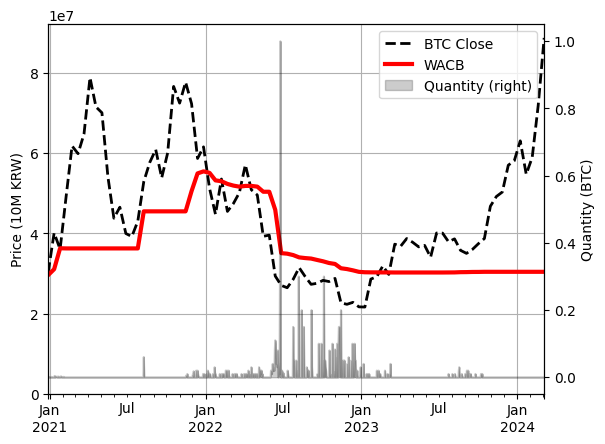

In [92]:
# 코드 13-86. 비트 코인 가격과 평균 매수 단가 시각화
# 비트코인 가격을 14일 주기로 추출해 시각화
(out['BTC Close']
 .asfreq('14D')
 .plot(color='black', grid=True, lw=2, ls='--', legend=True)
)

# 평균 매수단가(WACB)를 14일 주기로 추출해 시각화
(out['WACB']
 .asfreq('14D')
 .plot(color='red', grid=True, lw=3, ylabel='Price (10M KRW)', legend=True)
)

# 일자별 매수량의 면적그래프를 이중 y축(secondary_y)으로 생성
out['Quantity'].plot(
    kind='area', color='black', alpha=0.2, secondary_y=True,
    legend=True, ylabel='Quantity (BTC)'
)

<Axes: ylabel='Profit (100M KRW)'>

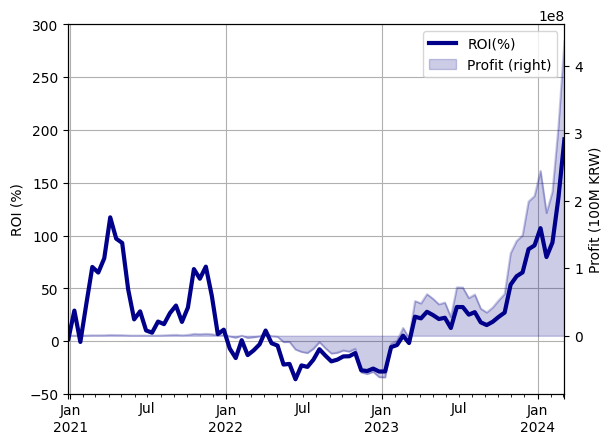

In [93]:
# 코드 13-87. 수익률과 누적 수익 시각화
# 수익률(ROI(%)) 시각화
(out['ROI(%)']
 .asfreq('14D')
 .plot(color='darkblue', legend=True, grid=True,
       lw=3, ylabel=('ROI (%)'), ylim=(-50, 300))
)

# 순수익의 면적그래프를 이중 y축(secondary_y)으로 생성
(out['Profit']
 .asfreq('14D')
 .plot(kind='area', stacked=False, alpha=0.2, color='darkblue',
       secondary_y=True, legend=True, ylabel='Profit (100M KRW)')
)